In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings

pd.set_option("display.max_columns", None)

warnings.filterwarnings("ignore")
#%load_ext nb_black

<IPython.core.display.Javascript object>

In [67]:
data_train = pd.read_csv(
    "/Users/vsinha/Desktop/ML/tabular-playground-series-mar-2021/train.csv", sep=","
)
data_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


<IPython.core.display.Javascript object>

In [104]:
data_test = pd.read_csv(
    "/Users/vsinha/Desktop/ML/tabular-playground-series-mar-2021/test.csv", sep=","
)
data_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,A,LF,A,A,A,A,B,D,D,B,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,A,MC,A,A,A,B,D,B,D,B,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,A,FN,A,A,A,B,B,D,D,B,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,A,HK,A,A,A,A,B,D,B,B,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,A,HX,A,A,A,A,D,D,D,B,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


<IPython.core.display.Javascript object>

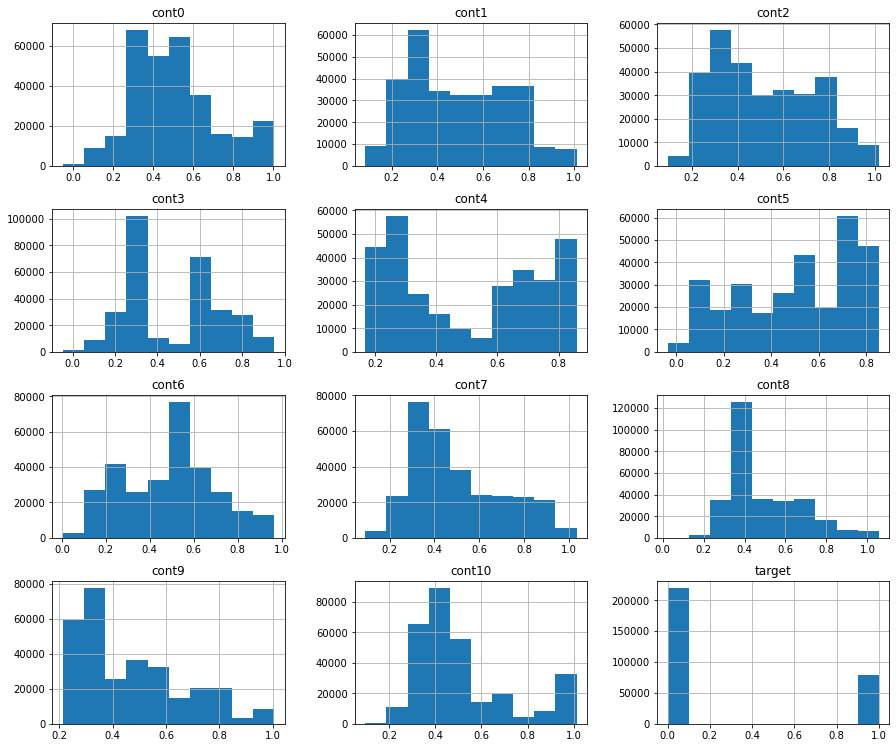

<IPython.core.display.Javascript object>

In [5]:
data_train.drop(["id"], axis=1).hist(figsize=(15, 30), layout=(9, 3))

<AxesSubplot:xlabel='count', ylabel='cat0'>

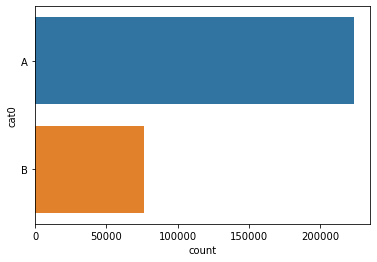

<AxesSubplot:xlabel='count', ylabel='cat1'>

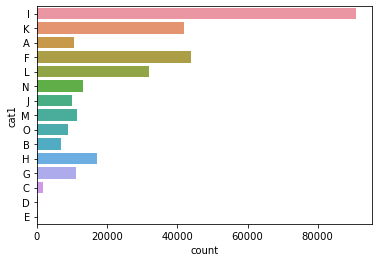

<AxesSubplot:xlabel='count', ylabel='cat2'>

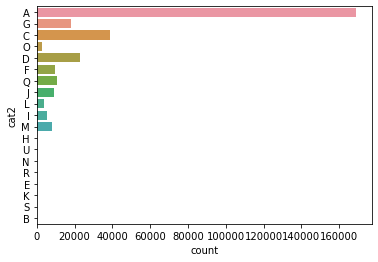

<AxesSubplot:xlabel='count', ylabel='cat3'>

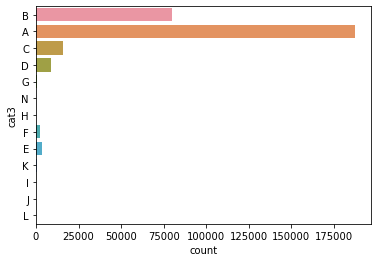

<AxesSubplot:xlabel='count', ylabel='cat4'>

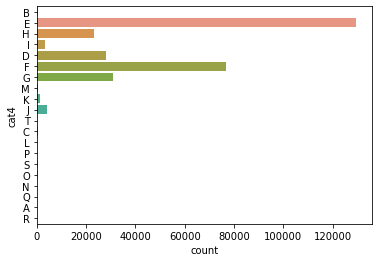

<AxesSubplot:xlabel='count', ylabel='cat6'>

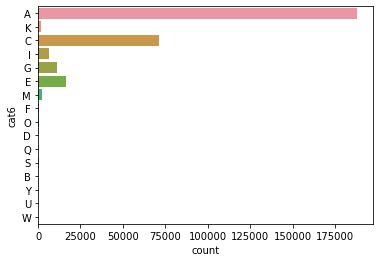

<AxesSubplot:xlabel='count', ylabel='cat9'>

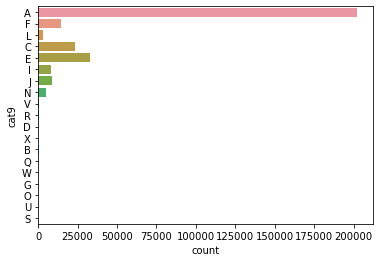

<AxesSubplot:xlabel='count', ylabel='cat11'>

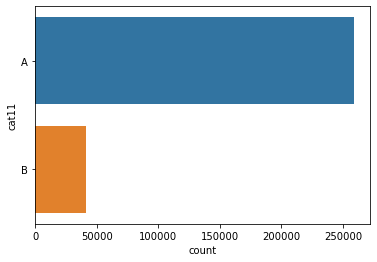

<AxesSubplot:xlabel='count', ylabel='cat12'>

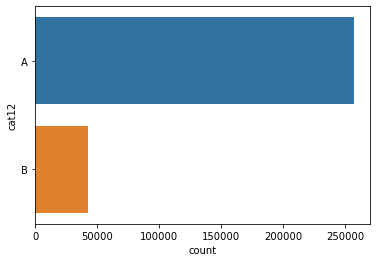

<AxesSubplot:xlabel='count', ylabel='cat13'>

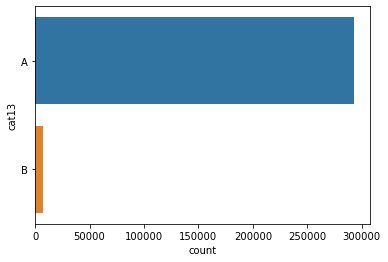

<AxesSubplot:xlabel='count', ylabel='cat14'>

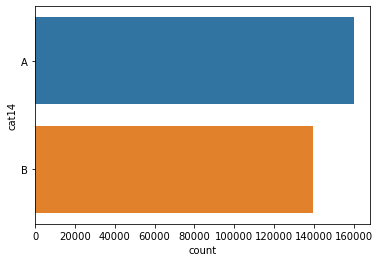

<AxesSubplot:xlabel='count', ylabel='cat15'>

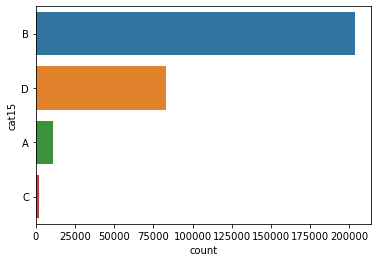

<AxesSubplot:xlabel='count', ylabel='cat16'>

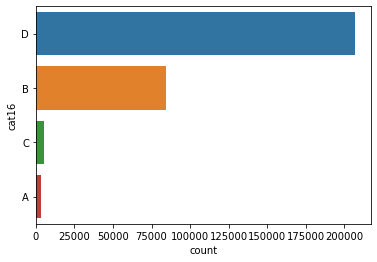

<AxesSubplot:xlabel='count', ylabel='cat17'>

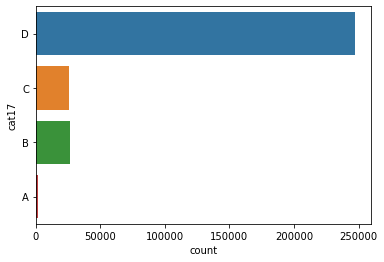

<AxesSubplot:xlabel='count', ylabel='cat18'>

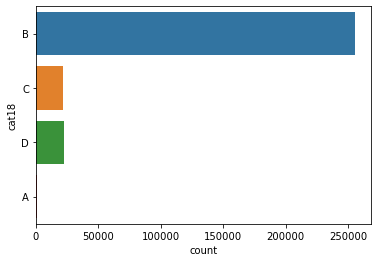

<IPython.core.display.Javascript object>

In [6]:
for column in data_train.select_dtypes(include="object"):
    if data_train[column].nunique() < 30:
        sns.countplot(y=column, data=data_train)
        plt.show()

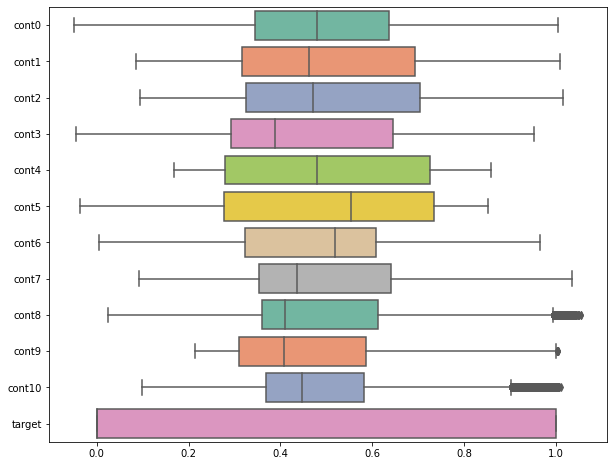

<IPython.core.display.Javascript object>

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_train.drop("id", axis=1), orient="h", palette="Set2")
plt.show()

In [106]:
data_train_woid = data_train.drop(["id"], axis=1)
y_train = data_train.target
data_test_woid = data_test.drop(["id"], axis=1)

<IPython.core.display.Javascript object>

In [107]:
data_train_woid.shape
data_test_woid.shape
y_train.shape

(300000, 31)

(200000, 30)

(300000,)

<IPython.core.display.Javascript object>

In [108]:
cat_cols = [feature for feature in data_train_woid.columns if "cat" in feature]

le = preprocessing.LabelEncoder()

for enc in cat_cols:
    le = preprocessing.LabelEncoder()
    data_train_woid[enc] = le.fit_transform(data_train_woid[enc])
    data_test_woid[enc] = le.fit_transform(data_test_woid[enc])

<IPython.core.display.Javascript object>

In [77]:
data_for_corr = data_train_woid.corr()

<IPython.core.display.Javascript object>

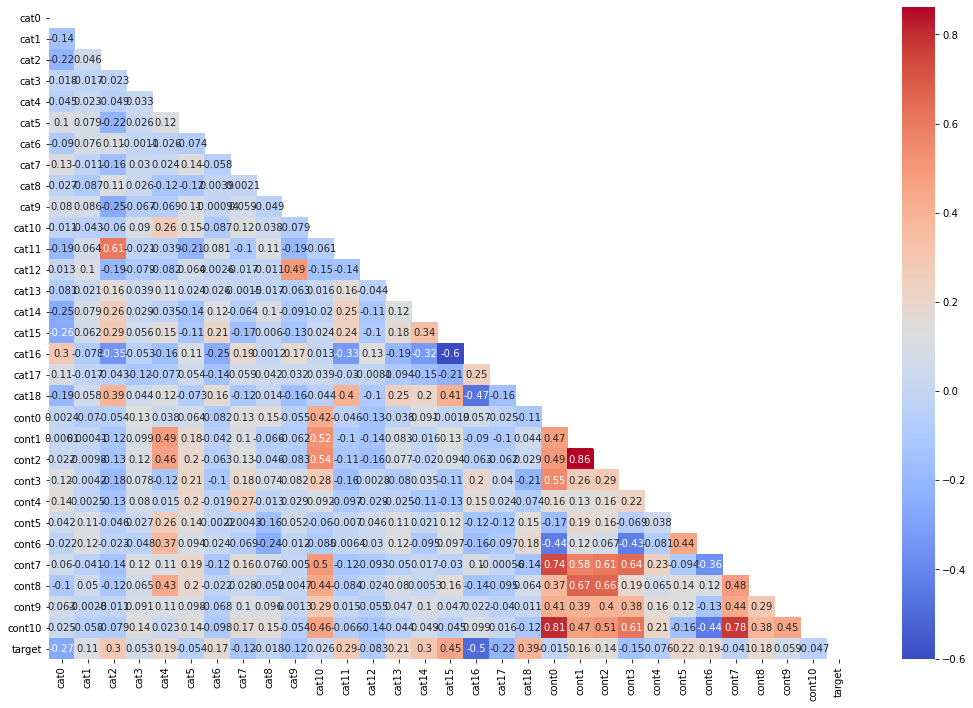

<IPython.core.display.Javascript object>

In [79]:
corr_matrix = data_for_corr
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.show()

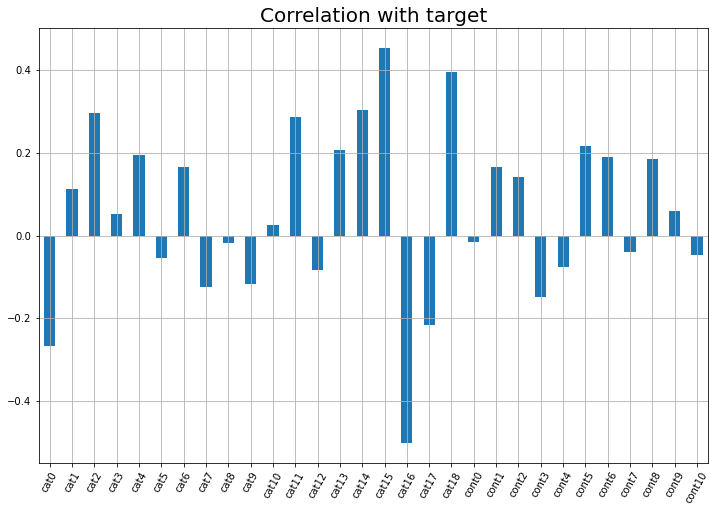

<IPython.core.display.Javascript object>

In [81]:
###Plot all the variables correlated against target
draw = data_train_woid.drop("target", axis=1)
draw.corrwith(y_train).plot(kind="bar", grid=True, figsize=(12, 8))
plt.title("Correlation with target", size=20)
plt.xticks(size=10, rotation=60)
plt.yticks(size=10)
plt.show()

In [82]:
X_train_final = data_train_woid.drop("target", axis=1)
X_train_final.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0,8,0,1,1,33,0,44,54,0,258,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0,8,0,0,4,33,8,48,3,5,162,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0,10,0,0,4,33,0,30,38,9,69,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0,10,0,2,4,33,0,50,3,5,241,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0,8,6,1,4,33,2,32,54,0,75,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


<IPython.core.display.Javascript object>

In [15]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: target, dtype: int64

<IPython.core.display.Javascript object>

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train_final, y_train, test_size=0.25, shuffle=True, random_state=42
)

print("X_train - ", X_train.shape)
print("y_train - ", y_train.shape)
print("X_validation - ", X_test.shape)
print("y_validation - ", y_test.shape)

X_train -  (225000, 30)
y_train -  (225000,)
X_validation -  (75000, 30)
y_validation -  (75000,)


<IPython.core.display.Javascript object>

In [84]:
###First XGB calssifier model where variables are label encoded
model = XGBClassifier()
model.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean ROC AUC: %.5f" % np.mean(scores))

[02:43:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Mean ROC AUC: 0.88776


<IPython.core.display.Javascript object>

In [85]:
print("ROC scores:\n", scores)

ROC scores:
 [0.88941661 0.88853462 0.88927491 0.88719597 0.8873797  0.88681473
 0.8862997  0.88776006 0.88886093 0.88811651 0.88674352 0.88938098
 0.89045092 0.88721026 0.88372232 0.88572451 0.88954964 0.88911899
 0.88595596 0.89030743 0.88315518 0.88561789 0.88424981 0.88715728
 0.8846228  0.88893316 0.88895593 0.89229128 0.88702684 0.89293182]


<IPython.core.display.Javascript object>

In [ ]:
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)
roc_auc_score(y_train, y_train_predict)
roc_auc_score(y_test, y_predict)

In [100]:
#params_for_testing = {
#    "min_child_weight": [1, 5, 10],
#    "gamma": [0.1, 0.5, 1, 2, 5],
#    "subsample": [0.6, 0.9],
#    "colsample_bytree": [0.6, 0.8],
#    "max_depth": [3, 5, 10],
#    "n_estimators": [10, 100, 1000],
#    "learning_rate": [0.0001, 0.01, 0.05, 0.1],
# }


<IPython.core.display.Javascript object>

In [101]:
# gsearch1 = GridSearchCV(
#    estimator=model,
#    cv=cv,
#    param_grid=params_for_testing,
#    scoring="roc_auc",
#    n_jobs=-1,
# )
# gsearch1.fit(X_train, y_train)
# print(gsearch1.grid_scores_)
# print("best params")
# print(gsearch1.best_params_)
# print("best score")
# print(gsearch1.best_score_)

<IPython.core.display.Javascript object>

In [96]:
###Second model where 4 cat variables are dropped due to higher unique value counts
X_train_final_new = data_train_woid.drop(
    ["target", "cat5", "cat7", "cat8", "cat10"], axis=1
)
X_train_final_new.head()

,cat0,cat1,cat2,cat3,cat4,cat6,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0,8,0,1,1,0,0,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,0,8,0,0,4,8,5,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,0,10,0,0,4,0,9,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,0,10,0,2,4,0,5,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,0,8,6,1,4,2,0,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


<IPython.core.display.Javascript object>

In [109]:
y_train_new = data_train.target
data_test_woid_new = data_test_woid.drop(["cat5", "cat7", "cat8", "cat10"], axis=1)

<IPython.core.display.Javascript object>

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_final_new, y_train_new, test_size=0.25, shuffle=True, random_state=42
)

print("X_train - ", X_train.shape)
print("y_train - ", y_train.shape)
print("X_validation - ", X_test.shape)
print("y_validation - ", y_test.shape)

X_train -  (225000, 26)
y_train -  (225000,)
X_validation -  (75000, 26)
y_validation -  (75000,)


<IPython.core.display.Javascript object>

In [125]:
# params_for_testing = {
#    "min_child_weight": [5, 10],
#    "gamma": [0.1, 0.5, 1],
#    "max_depth": [5, 10],
#    "n_estimators": [10, 100, 1000],
#    "learning_rate": [0.01, 0.05, 10],
# }

<IPython.core.display.Javascript object>

In [126]:
# gsearch1 = GridSearchCV(
#    estimator=model,
#    cv=cv,
#    param_grid=params_for_testing,
#    scoring="roc_auc",
#    n_jobs=-1,
# )
# gsearch1.fit(X_train, y_train)
# print(gsearch1.grid_scores_)
# print("best params")
# print(gsearch1.best_params_)
# print("best score")
# print(gsearch1.best_score_)

<IPython.core.display.Javascript object>

In [99]:
model_new = XGBClassifier()
model_new.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model_new, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean ROC AUC: %.5f" % np.mean(scores))

[14:19:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Mean ROC AUC: 0.88600


<IPython.core.display.Javascript object>

In [148]:
y_predict = model_new.predict(X_test)
y_train_predict = model_new.predict(X_train)
roc_auc_score(y_train, y_train_predict)
roc_auc_score(y_test, y_predict)

NameError: name 'model_new' is not defined

<IPython.core.display.Javascript object>

In [127]:
###One hot encoded models for 5 cat variables and remaining are label encoded

data_appended = data_train_woid.drop("target", axis=1).append(data_test_woid)

<IPython.core.display.Javascript object>

In [128]:
cat_cols = [feature for feature in data_appended.columns if "cat" in feature]

le = preprocessing.LabelEncoder()

for enc in cat_cols:
    le = preprocessing.LabelEncoder()
    data_appended[enc] = le.fit_transform(data_appended[enc])

<IPython.core.display.Javascript object>

In [129]:
encoded_data = pd.get_dummies(data_appended, columns=["cat5", "cat7", "cat8", "cat10"])

<IPython.core.display.Javascript object>

In [130]:
data_train_ohc = encoded_data.iloc[0:300000]
data_test_ohc = encoded_data.iloc[300000:]

<IPython.core.display.Javascript object>

In [131]:
y_train_new = data_train.target

<IPython.core.display.Javascript object>

In [132]:
X_train, X_test, y_train, y_test = train_test_split(
    data_train_ohc, y_train_new, test_size=0.25, shuffle=True, random_state=42
)

print("X_train - ", X_train.shape)
print("y_train - ", y_train.shape)
print("X_validation - ", X_test.shape)
print("y_validation - ", y_test.shape)

X_train -  (225000, 521)
y_train -  (225000,)
X_validation -  (75000, 521)
y_validation -  (75000,)


<IPython.core.display.Javascript object>

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


model_rs = XGBClassifier()
param_grid_rand = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "max_depth": [3, 5, 10],
    "n_estimators": [100, 500, 1000],
    "min_child_weight": [5, 10],
    "gamma": [0.5, 1, 2],
    "subsample": [0.6, 0.8, 0.9],
    "random_state": [42],
}


model = RandomizedSearchCV(
    estimator=model_rs,
    param_distributions=param_grid_rand,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 230.3min finished


[19:27:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

<IPython.core.display.Javascript object>

In [147]:
model.best_score_
model.best_params_

0.8480933333333333

{'subsample': 0.8,
 'random_state': 42,
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 2}

<IPython.core.display.Javascript object>

In [140]:
y_predict = model.best_estimator_.predict(X_test)
y_train_predict = model.best_estimator_.predict(X_train)
roc_auc_score(y_train, y_train_predict)
roc_auc_score(y_test, y_predict)

0.7809890518234898

0.7763426371072384

<IPython.core.display.Javascript object>

In [142]:
submission = pd.read_csv(
    "/Users/vsinha/Desktop/ML/tabular-playground-series-mar-2021/sample_submission.csv"
)
submission["target"] = model.best_estimator_.predict(data_test_ohc)
submission.to_csv("./xgboost_modelenc.csv", index=False, header=True)

<IPython.core.display.Javascript object>

In [143]:
submission["target"]

0         0
1         0
2         0
3         0
4         0
         ..
199995    1
199996    0
199997    1
199998    0
199999    0
Name: target, Length: 200000, dtype: int64

<IPython.core.display.Javascript object>

In [144]:
model_enc = XGBClassifier()
model_enc.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(
    model_enc, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1
)
print("Mean ROC AUC: %.5f" % np.mean(scores))

[13:59:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Mean ROC AUC: 0.88894


<IPython.core.display.Javascript object>

In [145]:
y_predict = model_enc.predict(X_test)
y_train_predict = model_enc.predict(X_train)
roc_auc_score(y_train, y_train_predict)
roc_auc_score(y_test, y_predict)

0.7939981608624348

0.7757236078679012

<IPython.core.display.Javascript object>